In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import bernoulli, norm, poisson
from scipy import stats
import seaborn as sns
from sklearn.linear_model import LinearRegression
from statistics import mean
import math

## Example 2
### Construct the model

$$X_1 \sim \mathcal{N}(0,\sigma^2)$$
$$Y= X_1+\varepsilon_y$$
$$X_2=Y+\varepsilon_2$$
$$\varepsilon_2 \sim \mathcal{N}(0,1)$$
$$\varepsilon_y \sim \mathcal{N}(0,\sigma^2)$$

$$\tilde{P}^{\sigma}(dX_1,dX_2,dY)=P(dX_1)W_{X_1}(dX_2)Q_{X_1}^{\sigma}(dy)$$ 
The equivariant predictor is $$\hat{y}_h=\begin{bmatrix}
           h^{-1} \\
           \frac{\sqrt{2\sigma^2+1}}{\sqrt{2h^2\sigma^2+1}}
         \end{bmatrix}\hat{y}$$
The invariant loss function is $$L(y,\hat{y})=log(｜y/\hat{y}｜)^2$$


### (1) Risk function
$$\hat{f}_2(X_2)=\int \hat{f}(gX_1,X_2)\lambda(dg)$$

In [63]:
def risk_2(n,sigma):
    list2=[]
    for i in range(1,11):
        X1_0=np.random.normal(0, sigma, n)
        Y=X1_0+np.random.normal(0,sigma, n)
        X2_0=Y+np.random.normal(0, 1, n)
        X1=X1_0
        X2=(((2*sigma**2+1)/(2*i**2*sigma**2+1)**0.5))*X2_0
        X=np.hstack([X1.reshape(-1,1), X2.reshape(-1,1)])
        y=np.hstack([Y.reshape(-1,1)])
        reg=LinearRegression().fit(X, y)
        pred=reg.predict(X)
        list2.append(sum((np.log(abs(y/pred)))**2)/n)
    return sum(list2)/10

### (2) Risk function 
$$\hat{f}_1(X_1)=\int \hat{f}(X_1,gX_2)\lambda(dg)$$

In [64]:
def risk_1(n,sigma):
    list1=[]
    for i in range(1,11):
        X1_0=np.random.normal(0, sigma, n)
        Y=X1_0+np.random.normal(0,sigma, n)
        X2_0=i*Y+np.random.normal(0, 1, n)
        X1=X1_0/i
        X2=(((2*sigma**2+1)/(2*i**2*sigma**2+1)**0.5))*X2_0
        X=np.hstack([X1.reshape(-1,1), X2.reshape(-1,1)])
        y=np.hstack([Y.reshape(-1,1)])
        reg=LinearRegression().fit(X, y)
        pred=reg.predict(X)
        list1.append(sum((np.log(abs(y/pred)))**2)/n)
    return sum(list1)/10

$$\sigma=1$$

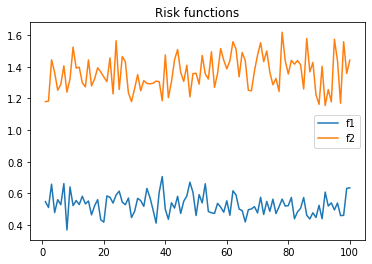

In [65]:
list1=[]
list2=[]


for i in range(100):
    list1.append(risk_1(100,1))
    list2.append(risk_2(100,1))
   
 
  
plt.figure()    
plt.plot(range(1,101),list1,label='f1')
plt.plot(range(1,101),list2,label='f2')

plt.legend(loc='best')
plt.title("Risk functions") 
plt.show()

$$\sigma=10$$

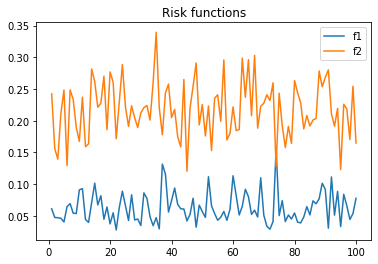

In [66]:
list1=[]
list2=[]


for i in range(100):
    list1.append(risk_1(100, 10))
    list2.append(risk_2(100, 10))
   
 
  
plt.figure()    
plt.plot(range(1,101),list1,label='f1')
plt.plot(range(1,101),list2,label='f2')

plt.legend(loc='best')
plt.title("Risk functions") 
plt.show()

$$\sigma=100$$

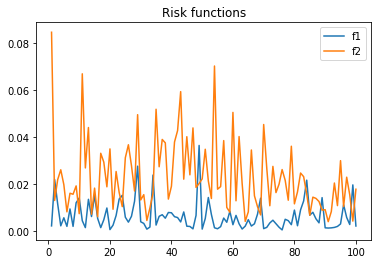

In [69]:
list1=[]
list2=[]


for i in range(100):
    list1.append(risk_1(100, 100))
    list2.append(risk_2(100, 100))
   
 
  
plt.figure()    
plt.plot(range(1,101),list1,label='f1')
plt.plot(range(1,101),list2,label='f2')

plt.legend(loc='best')
plt.title("Risk functions") 
plt.show()